# Mini-Batch Gradient Descent Training

- We have 640 instances with 2 attributes.
- Shape of X_train is (640,2).
- Shape of y_train is (640,).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

w = np.array([[0.8], [-0.2]])
b = 0.6

n_examples = 670

x1 = np.random.uniform(low=-10., high=10., size=(n_examples,))
x2 = np.random.uniform(low=-10., high=10., size=(n_examples,))
x = np.vstack((x1, x2)).T

# y = w1 * x1 + w2 * x2 + b
y = x @ w + b

noise = np.random.uniform(low=-.5, high=.5, size=(n_examples,))
noisy_y = y + noise

## Create a function to train the data using mini-batch gradient descent

- The function takes in batch size as the parameter.
- When updating the weights, the gradients learned after the backward operation are averaged.

In [2]:
def mini_batch_gradient_descent(
        x: np.ndarray,
        y: np.ndarray,
        batch_size: int,
        epochs: int,
        lr: float):
    
    # initialize the weights and biases
    w = np.array([
        [0.5], 
        [0.5]
    ])
    b = 0

    # get the number of batches
    n_examples = x.shape[0]
    no_of_batches = int(x.shape[0] / batch_size) + (1 if x.shape[0] % batch_size != 0 else 0)

    print(f"No of batches: {no_of_batches}")

    # perform mini batch training
    losses = []
    for _ in range(epochs):

        total_loss = 0
        start_batch_index = 0
        end_batch_index = (start_batch_index + batch_size) if (start_batch_index + batch_size) < n_examples else n_examples
        for _ in range(no_of_batches):

            # if (epoch == 0): print(start_batch_index, end_batch_index)
            
            # step 1: get the batch
            batch_x = x[start_batch_index:end_batch_index] # shape: (batch_size,2)
            batch_y = y[start_batch_index:end_batch_index] # shape: (batch_size,1)

            # step 2: get the prediction
            yhat = batch_x @ w + b # shape: (batch_size,1)

            # step 3: get the loss
            loss = np.sum(0.5 * (batch_y - yhat) ** 2) # shape: (batch_size,1)

            # step 4: calculate the gradients
            dL_dyhat = yhat - batch_y # shape: (batch_size,1)

            # step 4.1: average the gradients of the weights and bias
            dL_dw = np.atleast_2d(batch_x).T @ np.atleast_2d(dL_dyhat)
            dL_dw /= batch_size
            dL_db = np.mean(dL_dyhat) # shape: (batch_size,1)

            # step 5: update the weights
            w -= lr * dL_dw
            b -= lr * dL_db

            # step 6: update the index
            start_batch_index = end_batch_index
            if (start_batch_index + batch_size < n_examples):
                end_batch_index = start_batch_index + batch_size
            else: 
                end_batch_index = n_examples

            total_loss += loss
        
        losses.append(total_loss / n_examples)

    print(f"final loss: {total_loss / n_examples}")
    return w, b, losses

## Train the data using different batch sizes

- batch size of 1: stochastic gradient descent
- batch size of (n < total number of examples): mini-batch gradient descent
- batch size of (total number of examples): batch gradient descent

In [3]:
import time

epochs = 20
batch_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 670]

losses = np.zeros((len(batch_sizes), epochs))
for i, batch_size in enumerate(batch_sizes):

    print(f"batch size: {batch_size}")
    start = time.time()
    w, b, losses[i] = mini_batch_gradient_descent(
        x=x, 
        y=y, 
        batch_size=batch_size, 
        epochs=epochs, 
        lr=0.01,
    )
    end = time.time()
    print("time taken: %.5f seconds" % (end - start))
    print()

batch size: 1
No of batches: 670
final loss: 2.345145678120853e-30
time taken: 0.26625 seconds

batch size: 2
No of batches: 335
final loss: 3.7208851544669195e-30
time taken: 0.13359 seconds

batch size: 4
No of batches: 168
final loss: 9.727263900180178e-30
time taken: 0.06052 seconds

batch size: 8
No of batches: 84
final loss: 1.0361065450923715e-15
time taken: 0.03929 seconds

batch size: 16
No of batches: 42
final loss: 1.3570504449408456e-08
time taken: 0.02144 seconds

batch size: 32
No of batches: 21
final loss: 4.9590299369912586e-05
time taken: 0.00916 seconds

batch size: 64
No of batches: 11
final loss: 0.0024161095673675107
time taken: 0.00448 seconds

batch size: 128
No of batches: 6
final loss: 0.017059136175440446
time taken: 0.00248 seconds

batch size: 670
No of batches: 1
final loss: 0.11885699133966367
time taken: 0.00063 seconds



## Plot the graphs

Key observations:
- Stochastic Gradient Descent works the best, with the lowest loss seen.
- As the batch size increases, the starting loss starts to increase as well and the learning increases as each epoch.
- However, as the batch size increases, the loss also increases.
- Moreover, as the batch size increases, the training time decreases, considering hyperparameters and model structure are identical.

Therefore, there is a trade-off between the training time, performance and the batch size of the model.

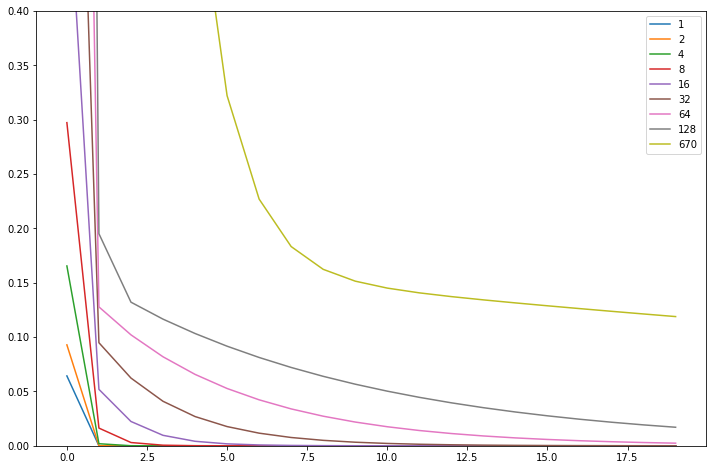

In [4]:
plt.figure(figsize=(12,8))
for loss, batch_size in zip(losses, batch_sizes):
    plt.plot(loss, label=str(batch_size))
plt.ylim((0., 0.4))
plt.legend()
plt.show()